In [1]:
# Libraries for handling data
import pandas as pd
import numpy as np

# Libraries for text processing
import nltk
import string

# Used for removing stopwords and breaking text into words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Libraries for ML model and data splitting
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Libraries for checking model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Libraries for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Download required NLTK files (run once)
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pranj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pranj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load the spam dataset
data = pd.read_csv("spam.csv", encoding='latin-1')

# Keep only required columns
data = data[['v1', 'v2']]

# Rename columns for clarity
data.columns = ['label', 'text']


In [4]:
# View first few rows of the dataset
data.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Check dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# Check count of spam and non-spam emails
data['label'].value_counts()


label
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
# Convert labels into numeric form (ham = 0, spam = 1)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})


In [8]:
# Load English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join(char for char in text if char not in string.punctuation)
    
    # Remove numbers
    text = ''.join(char for char in text if not char.isdigit())
    
    # Split text into words
    tokens = word_tokenize(text)
    
    # Remove common stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join words back into a sentence
    return ' '.join(tokens)


In [9]:
# Apply preprocessing to all messages
data['clean_text'] = data['text'].apply(preprocess_text)


In [10]:
# View cleaned text
data.head()


,label,text,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [11]:
# Convert text into numerical TF-IDF features
tfidf = TfidfVectorizer(max_features=3000)

# X contains features, y contains labels
X = tfidf.fit_transform(data['clean_text'])
y = data['label']


In [12]:
# Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [13]:
# Create Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train model on training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [14]:
# Predict spam or non-spam for test data
y_pred = model.predict(X_test)


In [15]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metric values
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


Accuracy : 0.9491626794258373
Precision: 0.9652777777777778
Recall   : 0.634703196347032
F1 Score : 0.7658402203856749


In [16]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[1448,    5],
       [  80,  139]])

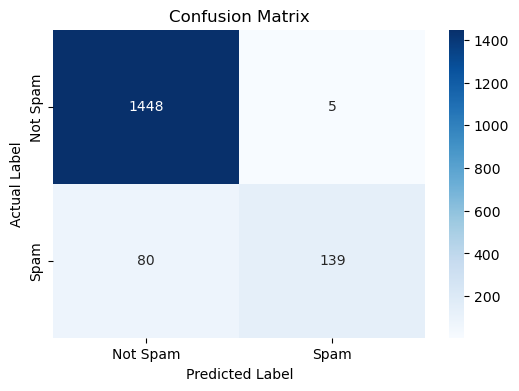

In [17]:
# Plot confusion matrix for better understanding
plt.figure(figsize=(6,4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Not Spam', 'Spam'],
    yticklabels=['Not Spam', 'Spam']
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()


In [18]:
# Get words and their corresponding coefficients
feature_names = tfidf.get_feature_names_out()
coefficients = model.coef_[0]

# Words that strongly indicate spam
top_spam_words = sorted(zip(coefficients, feature_names), reverse=True)[:10]

# Words that strongly indicate non-spam
top_ham_words = sorted(zip(coefficients, feature_names))[:10]

print("Top Spam Words:")
for coef, word in top_spam_words:
    print(word, coef)

print("\nTop Non-Spam Words:")
for coef, word in top_ham_words:
    print(word, coef)


Top Spam Words:
txt 4.471960060134225
claim 3.626427303674247
mobile 3.6052945717054783
free 3.5499139643229993
stop 3.4646254652128885
text 3.290041263058679
call 3.1784358149323304
reply 2.8161733044629504
prize 2.7370453630772755
win 2.5443484650159633

Top Non-Spam Words:
ltgt -1.904669709603891
ill -1.7244506496044303
im -1.70523279510966
ok -1.6282482078697604
sir -1.4034224597202423
later -1.3216269548203206
come -1.3019314861718625
da -1.2553033905630928
going -1.235137685111286
hey -1.1851788381382964


### Final Observation
- Logistic Regression works well for spam detection.
- Text preprocessing and TF-IDF improve accuracy.
- Model is simple and easy to understand.
